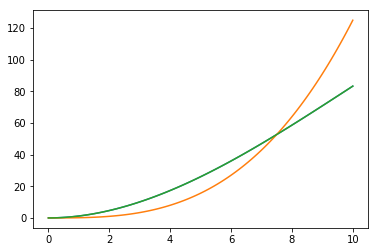

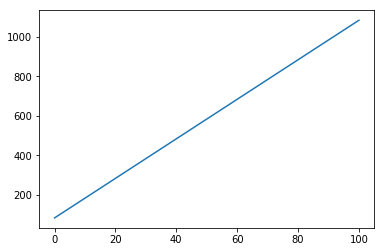

In [19]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.optimize import newton, fmin
from scipy.integrate import odeint


F = 1
E = 1
I = 1
L = 10
p = (3/4)
"""x1 = np.linspace(0,(L-p*L),100) #first portion
x2 = np.linspace((L-p*L),L,100) #second portion"""
v
                

def f1(r,x):
    y, dy = r
    fy = dy
    fdy = (p*F*x)/(E*I)
    return fy,fdy


def f2(r,x):
    y, dy = r
    fy = dy
    fdy = ((p-1)*F*x+((1-p)*F*L))/(E*I)
    return fy,fdy


"""dyiValues = np.linspace(0, 100, 500)
y1End = []
y2End = [] 
for dyi in dyiValues:
    r = odeint(f1, (0, dyi), x)
    y1,dy1 = r.T
    y1End.append(y1[-1])
    r = odeint(f2, (0, dyi), x)
    y2,dy2 = r.T
    y2End.append(y2[-1])
    if y1[-1] == y1[0]:
        dyiLoc = dyi
    
print(dyiLoc)    
plt.plot(dyiValues, y1End)
plt.grid()
plt.axhline(color="k")
plt.show()
plt.plot(dyiValues, y2End)
plt.grid()
plt.axhline(color="k")
plt.show()"""
dyiValues = np.linspace(0, 100, 500)
y2End = [] 
for dyi in dyiValues:
    r = odeint(f2, (0, dyi), x)
    y2,dy2 = r.T
    y2End.append(y2[-1])
r1 = odeint(f1, (0, 0), x)
y1,dy1 = r1.T
r2 = odeint(f2, (0, 0), x)
y2,dy2 = r2.T
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()
plt.plot(dyiValues, y2End)
plt.show()

In [3]:
#Testing shooting method
%reset -f

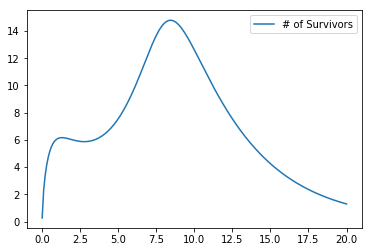

8.4377746582


In [20]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, interact
from scipy.integrate import simps
from scipy.optimize import newton, fmin
from scipy.integrate import odeint

def f (r,t):
    R, F = r
    dR = R - F*R/2
    dF = F*R/2 - 2*F
    return dR, dF

@np.vectorize
def survivors(F0):
    r = odeint(f, (4, F0), (0, 5))
    R, F = r.T
    return R[-1] + F[-1]

F0 = np.linspace(0.001, 20, 200)

plt.plot(F0, survivors(F0), label="# of Survivors")
plt.legend()
plt.show()

min_me = lambda F0: -survivors(F0)
F0_ideal, = fmin(min_me, 9, disp=False)
print(F0_ideal)

In [87]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wgt

#Length of Beam
L = 10

#Placeholders
Fmax = 1000000
Tmax = 10

#Material Constants (Young's Modulus, Ultimate Tensile Strength)
#https://www.engineeringtoolbox.com/young-modulus-d_417.html
Aluminum = (69e9, 110e6)
Pinewood = (9e9, 40e6)
Copper = (117e9, 220e6)
Steel = (180e9, 860e6)

#point mass at any location
def pointMass(length, location, modulus, force, mass):
    height = .25
    width = height
    
    L = length
    a = location
    b = L - location 
    E = modulus
    I = (1/12)*mass*(height**2 + width**2)
    F = force
    
    x1 = np.linspace(0,a,100)
    x2 = np.linspace(a,L,100)
    
    y1 = -(F*b*x1/(6*L*E*I))*(L**2-x1**2-b**2)
    y2 = -(F*b)/(6*L*E*I)*(L/b*(x2-a)**3 + (L**2 - b**2)*x2 - x2**3)

    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    
    return x, y

def uniformMass(length, modulus, force, mass):
    height = .25
    width = height

    E = modulus
    I = (1/12)*mass*(height**2 + width**2)
    F = force
    
    x = np.linspace(0,length,200)
    
    y = -(F*x/(24*E*I))*(L**3-2*L*x**2+x**3)
    
    return x, y


def interactive_fit_function(loadType, matProperties):
    F_slider = wgt.FloatSlider(min=0, max=Fmax, step=Fmax/10)
    P_slider = wgt.FloatSlider(min=0, max=L, step=0.1)

    if loadType == 'Point':
        @wgt.interact(F=F_slider, P=P_slider)
        def interactive_fit(F, P):
            
            x, ydisplacement = pointMass(L, P, matProperties[0], F, 22000)

            plt.figure(figsize = (12, 2))
            plt.plot(x, ydisplacement)
            plt.show()

    else:
        @wgt.interact(F=F_slider)
        def interactive_fit(F):
            x, ydisplacement = uniformMass(L, matProperties[0], F, 22000)

            plt.figure(figsize = (12, 2))
            plt.plot(x, ydisplacement)
            plt.show()
            

#Input Sliders
load = wgt.SelectMultiple(options=["Point", "Uniform"], description="Select a Load Type:")
@wgt.interact(loadType = load)            
def massType(loadType):
    for t in loadType:
        chooseMaterial(t)
        
def chooseMaterial(loadType):
    Material = wgt.SelectMultiple(options=["Aluminum", "Pinewood", "Copper", "Steel"], description="Select a Material:")
    @wgt.interact(mat = Material)            
    def materialType(mat):
        for m in mat:
            if m == 'Aluminum':
                matProperties = (69e9, 110e6)
            elif m == "Pinewood":
                matProperties = (9e9, 40e6)
            elif m == "Copper":
                matProperties = (117e9, 220e6)
            else: #Steel
                matProperties = (180e9, 860e6)

            interactive_fit_function(loadType, matProperties)
    

    '''
    if loadType == 'Point':
        interactive_fit_function()
    else:
        interactive_fit_uniform()
    '''


    
    


A Jupyter Widget